In [63]:
lang = ['spanish', 'es'] # select your file's language
''' [['arabic', 'ar'], ['azerbaijani', 'az'], ['basque', 'eu'], ['bengali', 'bn'], ['catalan', 'ca'], ['chinese', 'zh'], 
['danish', 'da'], ['dutch', 'nl'], ['english', 'en'], ['finnish', 'fi'], ['french', 'fr'], ['german', 'de'], ['greek', 'el'], 
['hebrew', 'he'], ['hinglish', 'hi'], ['hungarian', 'hu'], ['indonesian', 'id'], ['italian', 'it'], ['kazakh', 'kk'], 
['nepali', 'ne'], ['norwegian', 'no'], ['portuguese', 'pt'], ['romanian', 'ro'], ['russian', 'ru'], ['slovene', 'sl'], 
['spanish', 'es'], ['swedish', 'sv'], ['tajik', 'tg'], ['turkish', 'tr']
'''
tags = [lang, 'sentence::mining', 'La Caza', 'sentence::recognition'] # input the desired tags for ANKI
fields = [lang, 'defs', tags]

" [['arabic', 'ar'], ['azerbaijani', 'az'], ['basque', 'eu'], ['bengali', 'bn'], ['catalan', 'ca'], ['chinese', 'zh'], \n['danish', 'da'], ['dutch', 'nl'], ['english', 'en'], ['finnish', 'fi'], ['french', 'fr'], ['german', 'de'], ['greek', 'el'], \n['hebrew', 'he'], ['hinglish', 'hi'], ['hungarian', 'hu'], ['indonesian', 'id'], ['italian', 'it'], ['kazakh', 'kk'], \n['nepali', 'ne'], ['norwegian', 'no'], ['portuguese', 'pt'], ['romanian', 'ro'], ['russian', 'ru'], ['slovene', 'sl'], \n['spanish', 'es'], ['swedish', 'sv'], ['tajik', 'tg'], ['turkish', 'tr']\n"

In [64]:
''' 
SRT2CSV
vsulli
26 April 2025
read in a .srt file 
convert to a df to perform nlp
export to a .csv file for upload to ANKI
python 3.11.4
'''

import csv
import json
import nltk
import numpy as np
import pandas as pd
import pysrt
import re
import seaborn as sns
import spacy
nlp_es = spacy.load(r"C:\Users\paro\Documents\GitHub\SRT2CSV\es_core_news_sm-3.8.0\es_core_news_sm-3.8.0\es_core_news_sm\es_core_news_sm-3.8.0")
nlp_de = spacy.load(r"C:\Users\paro\Documents\GitHub\SRT2CSV\de_core_news_sm-3.0.0\de_core_news_sm-3.0.0\de_core_news_sm\de_core_news_sm-3.0.0")
import string

from nltk.corpus import stopwords
lang_sw = stopwords.words(lang[0])
from textblob import TextBlob

from langdetect import detect, LangDetectException

from tqdm.notebook import tqdm

# module that allows you to get meanings, translations, synonyms, and antonyms for supported langs
'''[bengali' (bn),'chinese (zh)', english' (en), 'french' (fr), 'german' (de), 
'italian' (it),'portuguese' (pt), 'romanian' (ro), 'russian'(ru), 'spanish'(es), 
'turkish' (tr)]'''
from PyMultiDictionary import MultiDictionary, DICT_EDUCALINGO
dictionary = MultiDictionary()

# allows for displaying multiple outputs in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

' \nSRT2CSV\nvsulli\n26 April 2025\nread in a .srt file \nconvert to a df to perform nlp\nexport to a .csv file for upload to ANKI\n'

C:\Users\paro\Coding Projects\Cato-AI_vs1.2\cuda\Lib\site-packages\spacy\util.py:910: UserWarning: [W095] Model 'es_core_news_sm' (3.8.0) was trained with spaCy v3.8.0 and may not be 100% compatible with the current version (3.7.5). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)
C:\Users\paro\Coding Projects\Cato-AI_vs1.2\cuda\Lib\site-packages\spacy\util.py:910: UserWarning: [W095] Model 'de_core_news_sm' (3.0.0) was trained with spaCy v3.0.0 and may not be 100% compatible with the current version (3.7.5). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


"[bengali' (bn),'chinese (zh)', english' (en), 'french' (fr), 'german' (de), \n'italian' (it),'portuguese' (pt), 'romanian' (ro), 'russian'(ru), 'spanish'(es), \n'turkish' (tr)]"

In [65]:
import tkinter as tk
from tkinter import filedialog

# keeps full GUI from appearing
root = tk.Tk()
root.withdraw()

# shows dialog box to ask for filename
filename = filedialog.askopenfilename()

''

In [66]:
# specify the encoding if UnicodeDecodeError
# you can open the file in NotePad and check SaveAs for default encoding
# ANSI, UTF-8
subs = pysrt.open(filename, encoding='utf-8')

In [67]:
def remove_formatting(subfile):
    # read through every sub line
    # using regex, delete section of line between <>
    # combine to string
    # update index
    for i in range(len(subfile)):
        # replace all characters between < and > with ""
        # using regex
        # strip white space from beginning
        subfile[i].text = subfile[i].text.lstrip()
        subfile[i].text = re.sub(r'<c.vtt_\w+>\s*"*', "", subfile[i].text)
        subfile[i].text = re.sub("</c>", "", subfile[i].text)
        # replace "-" with ""
        subfile[i].text = re.sub("-", "", subfile[i].text)

    return subfile

In [68]:
subs = remove_formatting(subs)

In [69]:
# create a dataframe with desired column name
def create_dataframe(subfile, col_name):
    # create dataframe
    df = pd.DataFrame(columns=[col_name])
    for i in range(len(subfile)):
        df.loc[i] = subfile[i].text
    return df

In [70]:
df = create_dataframe(subs, 'Subtitle')
df

,Subtitle
0,(Viento)
1,(Música new age)
2,(Pájaros)
3,Buenos días.
4,¿Has dormido bien?
...,...
828,No te tengo\nen mi lista de sospechosos.
829,Aquí en Monteperdido\nno te van a faltar.
830,Sabes que puedes pedirme\nlo que quieras.
831,Te voy a llevar a casa.


In [71]:
# create new dataframe removing the subtitle font tags
# go row by row - only include what's between > and < symbols

def remove_font_tags(df, col):
    new_df_list = []
    current_row = ""
    for i in range(len(df[col])):
        # slice between two characters > and < 
        match = re.findall(r'>(.*?)<', df[col][i])
        if match:
            new_df_list.append(match[0])
        else:
            new_df_list.append(df[col][i])

    return new_df_list

In [72]:
new_df_list = remove_font_tags(df,'Subtitle')

# create new df without font tags
new_df = pd.DataFrame(new_df_list)
new_df.rename(columns={0:"Subtitle"}, inplace=True)
new_df


,Subtitle
0,(Viento)
1,(Música new age)
2,(Pájaros)
3,Buenos días.
4,¿Has dormido bien?
...,...
828,No te tengo\nen mi lista de sospechosos.
829,Aquí en Monteperdido\nno te van a faltar.
830,Sabes que puedes pedirme\nlo que quieras.
831,Te voy a llevar a casa.


In [26]:
# append these rows to list and then create new df - more efficient than appending to df
# end characters at index -1 must be ) . ? ! 
def combine_rows(df, col):
    new_df_list = []
    current_row = ""
    for row in df[col]:
        if row[-1] == ")" or row[-1] == "." or row[-1] == "?" or row[-1] == "!":
            current_row += row
            new_df_list.append(current_row)
            current_row = ""
        else:
            current_row += row

    # create new df from the list of combined rows
    new_df = pd.DataFrame(new_df_list)
    new_df.rename(columns={0:col}, inplace=True)
    return new_df
    

In [73]:
# basic exploratory data analysis
def explore_data(dataframe, column):
    print(dataframe.head())
    print(dataframe.shape)
    print(dataframe.dtypes)
    print(dataframe.describe(include='all'))
    
explore_data(new_df, 'Subtitle')

             Subtitle
0            (Viento)
1    (Música new age)
2           (Pájaros)
3        Buenos días.
4  ¿Has dormido bien?
(833, 1)
Subtitle    object
dtype: object
       Subtitle
count       833
unique      808
top     ¡Lucía!
freq          5


In [74]:
# convert to lowercase
def make_lowercase(df, source_col, target_col):
    df[target_col] = df[source_col].str.lower()
    return df

In [75]:
# remove punctuation
def remove_punctuation(df, source_col, target_col):
    # ^ is a negation inside brackets (anything except)
    # starts with any word, digits, or underscore, white space character, apostrophe, + means any character in the string
    df[target_col] = df[source_col].str.replace(r"[^\w\s']+", ' ', regex = True)
    return df

In [76]:
# remove newline \n character
def remove_newline(df, source_col, target_col):
    df[target_col] = df[source_col].str.replace(r'\n', ' ', regex = True) # replaces the \n with a space
    return df

In [79]:
# remove newline from df
clean_df = remove_newline(new_df, 'Subtitle', 'Subtitle')
print(clean_df.head())

clean_df[102:103]


             Subtitle
0            (Viento)
1    (Música new age)
2           (Pájaros)
3        Buenos días.
4  ¿Has dormido bien?


,Subtitle
102,Y nosotros... no queremos ni podemos bajar los...


In [80]:
# make lowercase
clean_df = make_lowercase(clean_df, 'Subtitle', 'Lowercase')
print(clean_df.head())


             Subtitle           Lowercase
0            (Viento)            (viento)
1    (Música new age)    (música new age)
2           (Pájaros)           (pájaros)
3        Buenos días.        buenos días.
4  ¿Has dormido bien?  ¿has dormido bien?


In [81]:
# remove punctuation
clean_df = remove_punctuation(clean_df, 'Subtitle', 'No Punctuation')
print(clean_df.head())
clean_df[102:103]

             Subtitle           Lowercase      No Punctuation
0            (Viento)            (viento)             Viento 
1    (Música new age)    (música new age)     Música new age 
2           (Pájaros)           (pájaros)            Pájaros 
3        Buenos días.        buenos días.        Buenos días 
4  ¿Has dormido bien?  ¿has dormido bien?   Has dormido bien 


,Subtitle,Lowercase,No Punctuation
102,Y nosotros... no queremos ni podemos bajar los...,y nosotros... no queremos ni podemos bajar los...,Y nosotros no queremos ni podemos bajar los b...


In [82]:
# word tokenizer
# basic tokenizer splits on apostrophe
# tweet tokenizer does not

def tokenize_words(df, source_col):
    df['Word Tokens'] = df[source_col].apply(nltk.word_tokenize)
    return df

In [83]:
clean_df = tokenize_words(clean_df, 'No Punctuation')
clean_df['Word Tokens']

0                                              [Viento]
1                                    [Música, new, age]
2                                             [Pájaros]
3                                        [Buenos, días]
4                                  [Has, dormido, bien]
                             ...                       
828     [No, te, tengo, en, mi, lista, de, sospechosos]
829    [Aquí, en, Monteperdido, no, te, van, a, faltar]
830     [Sabes, que, puedes, pedirme, lo, que, quieras]
831                       [Te, voy, a, llevar, a, casa]
832            [Sara, no, entres, ahí, Déjala, en, paz]
Name: Word Tokens, Length: 833, dtype: object

In [84]:
def tokenize_sentences(df, source_col):
    df['Sentence Tokens'] = df[source_col].apply(nltk.sent_tokenize)
    return df

In [85]:
clean_df['Sentence Tokens'] = clean_df['No Punctuation'].apply(nltk.sent_tokenize)
clean_df['Sentence Tokens']

0                                      [ Viento]
1                              [ Música new age]
2                                     [ Pájaros]
3                                  [Buenos días]
4                            [ Has dormido bien]
                         ...                    
828     [No te tengo en mi lista de sospechosos]
829    [Aquí en Monteperdido no te van a faltar]
830    [Sabes que puedes pedirme lo que quieras]
831                     [Te voy a llevar a casa]
832       [ Sara  no entres ahí   Déjala en paz]
Name: Sentence Tokens, Length: 833, dtype: object

In [90]:
# remove stopwords

# open existing file of removed words
def load_removed_words(lang):
    try:
        with open(lang[1]+"_removed_words.json", "r") as f:
            removed_words = set(json.load(f))
    #JSONDecodeError - if file is empty       
    except (FileNotFoundError, json.JSONDecodeError):
        removed_words = set()
    
    removed_words.update(lang_sw)

    # save new set
    with open(lang[1]+"_removed_words.json", "w") as f:
        json.dump(list(removed_words), f)
        
    # return set of removed words
    return removed_words

In [91]:
# extend the stop words with list of custom words
# uppr_flag - all uppercase version of word removed
# lwr_flag - all lowercase version of word removed
# title_flag - title case of word removed
def extend_removed_words(lang, custom_stop_words, uppr_flag=False, lwr_flag=False, title_flag=False):
    # save to JSON file
    try:
        with open(lang[1]+"_removed_words.json", "r") as f:
            removed_words = set(json.load(f))
    except FileNotFoundError:
        removed_words = set()
    
    if uppr_flag:
        removed_words.update(list(map(str.upper, custom_stop_words)))
    
    if lwr_flag:
        removed_words.update(list(map(str.lower, custom_stop_words)))
        
    if title_flag:
        removed_words.update(list(map(str.title, custom_stop_words)))
    
    # remove only original list provided
    removed_words.update(custom_stop_words)

    with open(lang[1]+"_removed_words.json", "w") as f:
        json.dump(list(removed_words), f)
        
    return removed_words

In [92]:
# remove from removed words file

def add_back_words(lang, desired_words, uppr_flag=False, lwr_flag=False, title_flag=False):
    try:
        with open(lang[1]+"_removed_words.json", "r") as f:
            removed_words = set(json.load(f))

    except (FileNotFoundError, json.JSONDecodeError):
        removed_words = set()
        
    if uppr_flag:
         removed_words.difference_update(list(map(str.upper, desired_words)))
    
    if lwr_flag:
         removed_words.difference_update(list(map(str.lower, desired_words)))
        
    if title_flag:
        removed_words.difference_update(list(map(str.title, desired_words)))

    # add back words (remove from set)
    removed_words.difference_update(desired_words)

    with open(lang[1]+"_removed_words.json", "w") as f:
        json.dump(list(removed_words), f)
        
    return removed_words

In [104]:
removed_words = load_removed_words(lang)

# names of characters, places, capitalizations of pronouns, etc.
custom_stop_words = ["no"]

removed_words = extend_removed_words(lang, custom_stop_words, title_flag=True)

desired_words = []
removed_words = add_back_words(lang, desired_words, title_flag=True)

In [105]:
# create new column without all removed words
clean_df['No Stop Words'] = clean_df['Word Tokens'].apply(lambda x: [item for item in x if item not in removed_words])
clean_df[100:120]

,Subtitle,Lowercase,No Punctuation,Word Tokens,Sentence Tokens,No Stop Words
100,¿Dónde están nuestras hijas?,¿dónde están nuestras hijas?,Dónde están nuestras hijas,"[Dónde, están, nuestras, hijas]",[ Dónde están nuestras hijas],"[Dónde, hijas]"
101,¿Quién se las llevó?,¿quién se las llevó?,Quién se las llevó,"[Quién, se, las, llevó]",[ Quién se las llevó],"[Quién, llevó]"
102,Y nosotros... no queremos ni podemos bajar los...,y nosotros... no queremos ni podemos bajar los...,Y nosotros no queremos ni podemos bajar los b...,"[Y, nosotros, no, queremos, ni, podemos, bajar...",[Y nosotros no queremos ni podemos bajar los ...,"[queremos, podemos, bajar, brazos]"
103,pero tampoco somos capaces de hacerlo solos.,pero tampoco somos capaces de hacerlo solos.,pero tampoco somos capaces de hacerlo solos,"[pero, tampoco, somos, capaces, de, hacerlo, s...",[pero tampoco somos capaces de hacerlo solos],"[tampoco, capaces, hacerlo, solos]"
104,"Necesitamos la implicación de las autoridades,","necesitamos la implicación de las autoridades,",Necesitamos la implicación de las autoridades,"[Necesitamos, la, implicación, de, las, autori...",[Necesitamos la implicación de las autoridades],"[Necesitamos, implicación, autoridades]"
105,que escuchen nuestras peticiones.,que escuchen nuestras peticiones.,que escuchen nuestras peticiones,"[que, escuchen, nuestras, peticiones]",[que escuchen nuestras peticiones],"[escuchen, peticiones]"
106,Me gustaría que el padre Bertrand se acercara ...,me gustaría que el padre bertrand se acercara ...,Me gustaría que el padre Bertrand se acercara ...,"[Me, gustaría, que, el, padre, Bertrand, se, a...",[Me gustaría que el padre Bertrand se acercara...,"[Me, gustaría, padre, Bertrand, acercara, term..."
107,con una oración por las niñas.,con una oración por las niñas.,con una oración por las niñas,"[con, una, oración, por, las, niñas]",[con una oración por las niñas],"[oración, niñas]"
108,Gracias.,gracias.,Gracias,[Gracias],[Gracias],[Gracias]
109,"Dios todopoderoso,","dios todopoderoso,",Dios todopoderoso,"[Dios, todopoderoso]",[Dios todopoderoso],"[Dios, todopoderoso]"


In [106]:
clean_df[100:101]['Subtitle']
clean_df[0:20]['No Stop Words']

100    ¿Dónde están nuestras hijas?
Name: Subtitle, dtype: object

0                                              [Viento]
1                                    [Música, new, age]
2                                             [Pájaros]
3                                        [Buenos, días]
4                                  [Has, dormido, bien]
5                                        [Canta, gallo]
6                                       [quiero, lunes]
7                        [Está, nevando, Está, nevando]
8                                                [Hala]
9                          [Buenos, días, Buenos, días]
10    [Papá, date, prisa, Quiero, llegar, cole, juga...
11                                  [Me, puedo, duchar]
12                  [Papá, ducha, preparamos, desayuno]
13              [Ve, ducharte, venga, Bueno, venga, va]
14                           [Me, echando, cama, Fuera]
15                        [Venga, dormilón, A, órdenes]
16                                    [empeñado, avise]
17                          [Álvaro, lleva, cole

In [107]:
# create a frequency diagram without stop words

# list of all words
words = []
for index, row in clean_df.iterrows():
    for word in row['No Stop Words']:
        words.append(word)
words[0:20]

['Viento',
 'Música',
 'new',
 'age',
 'Pájaros',
 'Buenos',
 'días',
 'Has',
 'dormido',
 'bien',
 'Canta',
 'gallo',
 'quiero',
 'lunes',
 'Está',
 'nevando',
 'Está',
 'nevando',
 'Hala',
 'Buenos']

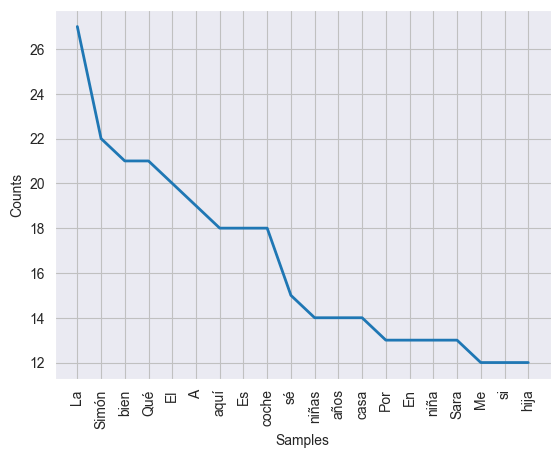

<Axes: xlabel='Samples', ylabel='Counts'>

In [108]:
# plot the word frequency
sns.set_style('darkgrid')
freq_words = nltk.FreqDist(words)
freq_words.plot(20)

In [109]:
# find the rows that contain a specific word
def find_word(df, word):
    pattern = rf'\b{re.escape(word)}\b'

    # rows where the subtitle column contains the word
    row_matches = clean_df[clean_df['Subtitle'].str.contains(pattern, case=False, regex=True, na=False)]

    # return just the Subtitle column
    sub_col_match = row_matches[['Subtitle']]
    return sub_col_match


matches = find_word(clean_df, 'Ana')
matches


,Subtitle
16,Ana se ha empeñado en que avise a Lucía.
20,¡Ana!
89,Ana y Lucía desaparecieron
111,Ana y Lucía.
118,"Y, por otro lado, también tenemos a los padres..."
137,¿Sabemos algo más de la familia de Ana?
174,Queremos conocer a las familias de Ana y Lucía...
205,Hemos encontrado a Ana.
211,"Completamente. Es su hija, es Ana."
226,el sistema reveló una coincidencia. Se trata d...


In [110]:
# PyMultiDictionary to get definition

# retrieves part of speech, explanations
print(dictionary.meaning('es', 'ladrar', dictionary=DICT_EDUCALINGO))


(['Verb'], 'The first definition of barking in the dictionary of the real academy of the Spanish language is said of a dog: Give barks. Another meaning of barking in the dictionary is to threaten without rushing. To bark is also to challenge, to label, ordinarily with malignity. La primera definición de ladrar en el diccionario de la real academia de la lengua española es dicho de un perro: Dar ladridos. Otro significado de ladrar en el diccionario es amenazar sin acometer. Ladrar es también impugnar, motejar, de ordinario con malignidad.', '')


In [111]:
# extract only desired language from definition
def extract_desired_lang(word, lang):
    # Get the dictionary result
    res = dictionary.meaning(lang, word, dictionary=DICT_EDUCALINGO)
    
    if not res or not res[1]:
        return None
    
    pos_tags, text, _ = res
    
    # split into sentences
    sentences = text.split('. ')
    
    # desired language sentences
    my_sentences = []
    
    for sent in sentences:
        sent = sent.strip() 
        if not sent:
            continue
        
        try:
            detected_lang = detect(sent)
            
            # check if desired lang
            if detected_lang == lang:
                my_sentences.append(sent)
        except LangDetectException:
            # skip if not desired lang
            continue
    
    # combine sentences and return
    return ' '.join(my_sentences)

In [112]:
# updated for es and de
def get_article_for_noun(lang, noun):
    match lang[1]:
        case "de":
            nlp = nlp_de
        case "es":
            nlp = nlp_es
        case _:
            return ""
    # process the noun using spaCy
    doc = nlp(noun)
    
    # Check if it's a noun and has a valid gender tag
    # only works if appropriately capitalized
    for token in doc:
        if token.pos_ == "NOUN":
            # Based on the gender, return the correct article
            if token.morph.get("Gender") == ["Masc"]:
                return "der" if lang[1] == "de" else "el"
            elif token.morph.get("Gender") == ["Fem"]:
                return "die" if lang[1] == "de" else "la"
            elif token.morph.get("Gender") == ["Neut"]:
                return "das"
            else:
                return ""
    return ""

In [113]:
# get base form of word (for conjugated verbs & plurals)
def get_base_word(lang, word):
    match lang[1]:
        case "de":
            nlp = nlp_de
        case "es":
            nlp = nlp_es
        case _:
            return ""
        
    doc = nlp(word)
    return doc[0].lemma_ # ex) "bellt -> bellen"
        
        


In [114]:
# export sentences to a .csv file

# construct a dictionary entry for all words in desired column
# word [pos]: definition
# space
# word2 [pos]: definition

# word from no stop words col ; definition ; tags
def construct_csv(df, source_col, fields, csv_name="subtitles.csv"):
    csv_rows = []
    seen_words = set()
    for _, row in tqdm(df.iterrows(), total=len(df), desc="Exporting subtitles to CSV..."):
        sentence = row[source_col]
        words = row['No Stop Words']
        
        for w in words:
            if w in seen_words:
                break
            seen_words.add(w)
            article = get_article_for_noun(lang, w)
            meaning = dictionary.meaning(fields[0][1], w, dictionary=DICT_EDUCALINGO)
            if meaning and meaning[0]:
                pos = meaning[0][0]
            else:
                pos = "?"
            definition = extract_desired_lang(w, fields[0][1])
            tags = fields[2]
            tag_string = ",".join([",".join(tag) if isinstance(tag, list) else tag for tag in tags])
            #TODO bold the word in csv file
            csv_rows.append([sentence, f"{article} {w} [{pos}]:{definition}", tag_string])
    output_df = pd.DataFrame(csv_rows, columns=['Sentence', 'Definition', 'Tags'])
    
    output_df.to_csv(csv_name, index=False, header=False, encoding='utf-8-sig', sep = ";", quotechar='"')
    print(f"✅ CSV saved with {len(csv_rows)} rows.")
    


In [115]:
# construct a dictionary entry for all words in desired column and export to csv
# Front of Card: sentence
# Back of Card: [article] word : definition
# Tags
# searches entire dataframe for word before moving to next word

def construct_csv(df, source_col, fields, csv_name="subtitles.csv"):
    csv_rows = []
    seen_words = set()
    lang = fields[0]
    
    for _, row in tqdm(df.iterrows(), total=len(df), desc="Exporting subtitles to CSV..."):
        sentence = row[source_col]
        words = row['No Stop Words']
        
        for w in words:
            if w in seen_words:
                continue  # skip words already processed
            seen_words.add(w)

            # find all sentences with the word
            matching_rows = df[df[source_col].str.contains(rf'\b{re.escape(w)}\b', case=False, na=False)]

            for _, match_row in matching_rows.iterrows():
                sentence_match = match_row[source_col]
                sentence_bolded = sentence_match.replace(w, f"<mark><b>{w}</b></mark>")
                base_word = get_base_word(lang, w)
                article = get_article_for_noun(lang, base_word)
                meaning = dictionary.meaning(lang[1], base_word, dictionary=DICT_EDUCALINGO)
                pos = meaning[0][0] if meaning and meaning[0] else "?"
                definition = extract_desired_lang(base_word, lang[1])
                tags = fields[2]
                tag_string = ",".join(tag if isinstance(tag, str) else ",".join(tag) for tag in tags)

                csv_rows.append([sentence_bolded, f"{article} {base_word} [{pos}]:{definition}", tag_string])
    
    output_df = pd.DataFrame(csv_rows, columns=['Sentence', 'Definition', 'Tags'])
    output_df.to_csv(csv_name, index=False, header=False, encoding='utf-8-sig', sep=";", quotechar='"')
    print(f"✅ CSV saved with {len(csv_rows)} rows.")
    return output_df


In [57]:
# export to csv only if there is/are <= "max_words" unknown/non-stop words in column
def construct_max_w_csv(df, source_col, fields, max_words=1, csv_name="max_words_subtitles.csv"):
    csv_rows = []
    seen_words = set()
    lang = fields[0]

    # filter the 'No Stop Words' column <= max_words
    # create a new df based on if the no stop words column had a word list <= max
    filtered_df = df[df['No Stop Words'].apply(lambda wl: len(wl) <= max_words)]

    for _, row in tqdm(filtered_df.iterrows(), total=len(filtered_df), desc="Exporting subtitles to CSV..."):
        sentence = row[source_col]
        words = row['No Stop Words']

        for w in words:
            if w in seen_words:
                continue  # skip if already seen
            seen_words.add(w)
            
            # search for other rows that include word
            matching_rows = filtered_df[filtered_df[source_col].str.contains(rf'\b{re.escape(w)}\b', case=False, na=False)]
            
            for _, match_row in matching_rows.iterrows():
                sentence_match = match_row[source_col]
                # bold and highlight the word
                sentence_bolded = re.sub(rf'\b({re.escape(w)})\b', r"<mark><b>\1</b></mark>", sentence_match)
                base_word = get_base_word(lang, w)
                article = get_article_for_noun(lang, base_word)
                meaning = dictionary.meaning(lang[1], base_word, dictionary=DICT_EDUCALINGO)
                pos = meaning[0][0] if meaning and meaning[0] else "?"
                definition = extract_desired_lang(base_word, lang[1])
                tags = fields[2]
                tag_string = ",".join(tag if isinstance(tag, str) else ",".join(tag) for tag in tags)

                csv_rows.append([sentence_bolded, f"{article} {base_word} [{pos}]:{definition}", tag_string])

    output_df = pd.DataFrame(csv_rows, columns=['Sentence', 'Definition', 'Tags'])
    output_df.to_csv(csv_name, index=False, header=False, encoding='utf-8-sig', sep=";", quotechar='"')
    print(f"✅ CSV saved with {len(csv_rows)} rows.")
    return output_df

In [58]:
test_data_de= {'Subtitle':['Der Hund ist tot.','Papageien leben lange.', 'Hat sie die Papageien gefüttert? ', 'Der Hund bellt.'],
            'No Stop Words':[['Hund', 'tot'],['Papageien', 'leben', 'lange'], ['Hat', 'Papageien', 'gefüttert'], ['Hund', 'bellt']]}
df_test = pd.DataFrame(test_data_de)
csv_df = construct_max_w_csv(df_test, 'Subtitle', fields, max_words = 2)

Exporting subtitles to CSV...:   0%|          | 0/2 [00:00<?, ?it/s]

✅ CSV saved with 4 rows.


In [116]:
test_data_es= {'Subtitle':['El perro está durmiendo en el piso.','El perro siempre me ladra. ', 'Los perros son animales leales. ', 'Ten cuidado con el perro. '],
            'No Stop Words':[['durmiendo', 'piso'],['siempre', 'ladra'], ['animales', 'leales'], ['cuidado']]}
df_test = pd.DataFrame(test_data_es)
csv_df = construct_max_w_csv(df_test, 'Subtitle', fields, max_words = 2)

Exporting subtitles to CSV...:   0%|          | 0/4 [00:00<?, ?it/s]

✅ CSV saved with 7 rows.


In [ ]:
# TODO


# refactor code & formatting

# format Github with summary text&screenshots & create demo sheet


# FUTURE IMPROVEMENTS

# change educalingo dictionary to web scraping an actual dictionary for better definitions and articles for nouns?
# add article & plural of noun - create new function that finds it based on language (key = lang & gender, value = der, die, das or el, la, etc.)

# extend the verb definition to include tense -> go deeper into spaCy lemmatization

# NOTES / LIMITATIONS

# Notepad++ convert ANSI to UTF-8 for special characters
# seems to need to be UTF-8 BOM in order to preserve special characters

# hinglish doesn't have an official language code